# Importing and defining things that we will need throughout this exercise.

In [1]:
import pandas as pd
import numpy as np

#This are the packages we will use for manipulating dates on our table.
from datetime import datetime
from dateutil.relativedelta import relativedelta

# This are the packages that we will use for creating our graphs.
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

## Let's open our dataset and take a look at our table.

In [2]:
df = pd.read_csv('olympic-games/athletes.csv')

In [3]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


# Exercise 1: What is the average age of a male and female athlete?

Approach:

1) We will start by creating a new columns where we will save 'dob' as datetime objects.

2) We will use relativedelta to obtain age.

3) We will calculate the mean for both male and female athlestes.

### Let's first do this for just one entry:

In [4]:
#Example
dt = datetime.strptime('10/17/69', '%m/%d/%y')
print(dt)

1969-10-17 00:00:00


#### datetime.strptime takes two arguments, the first one is the date in string format and the second one corresponds to the format.

### The Olympic Games of 2016 started in August 5th so let's convert that day too so that we can compute age.

In [5]:
Odt = datetime.strptime('08/05/16', '%m/%d/%y')
print(Odt)

2016-08-05 00:00:00


### Let's calculate the age by taking the difference

In [6]:
relativedelta(Odt, dt).years

46

## So we have that this particular athlete was 46 years old when the Olympic games started.

You can imagine that doing this for manually for every athlete would take a while so let's write a function that does this for us and adds the results to a new column in our table.

In [7]:
Odt = datetime.strptime('08/05/16', '%m/%d/%y')
# This function takes in a row, extracts dob and returns age.
def Age(row):
    try:
        dt = datetime.strptime(row['dob'], '%m/%d/%y')
        return relativedelta(Odt, dt).years
    except:
        pass
#The try-except is included because in we are missing the date of birth in a few athletes.    

### Lets now create a new column and populate it with the results of the previous function.

In [8]:
df['age'] = df.apply(lambda x: Age(x), 1)

In [9]:
# Let's take a peek at our table now
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,46.0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,29.0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,24.0
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,25.0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,25.0


### We have sucessfully created a column for age.

In [10]:
dfM = df[df['sex'] == 'male']
dfF = df[df['sex'] == 'female']

In [11]:
#Now to answer our question:
print('the average age among female athletes is:', dfF['age'].mean())

the average age among female athletes is: 25.44418828049952


In [12]:
print('the average age among male athletes is:', dfM['age'].mean())

the average age among male athletes is: 26.024320909665192


# Exercise 2: What are the most common dates of birth?

In [13]:
dfDOB = df.groupby('dob')['id'].count().reset_index()
dfDOB.columns = ['dob', 'count']
dfDOB = dfDOB.sort_values(by='count', ascending=False)

In [14]:
dfDOB.head(3)

,dob,count
2699,3/5/88,9
1997,2/18/93,9
1573,12/20/90,9


# Exercise 3: How about the most common birthdays?

In [15]:
def Date(row):
    try:
        return str(row['dob'].split('/')[:2])
    except:
        pass
dummy = df.apply(lambda x: Date(x), 1)

In [16]:
dummy = pd.DataFrame(dummy)
dummy.columns = ['date']
dummy.head()

,date
0,"['10', '17']"
1,"['9', '23']"
2,"['5', '27']"
3,"['1', '2']"
4,"['11', '26']"


In [17]:
dummy['date'].value_counts().reset_index().head()

,index,date
0,"['1', '1']",58
1,"['2', '5']",51
2,"['2', '10']",48
3,"['1', '20']",47
4,"['1', '10']",47


## January 1st is the default birthday for an athlete who does not know his or her real birthday. An according to Census data January first is the least common day for birthdays. The most common birthday among athletes probably is then February 5th.

# Exercise 4: What are the Countries with more than 100 medals?

In [19]:
# Lets take a quick look at our table again.
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,46.0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,29.0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,24.0
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,25.0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,25.0


Approach:

1) Create a new table where we only keep track of the country, medals and count.

2) Group by country and then sum amount of medals.

3) Order by the amount of medals.

### Pandas has a very useful function called 'melt' that allows you to turn a collection of columns into one categorical column and a numerical one. Lets see how it works.

In [20]:
df1 = pd.melt(df, id_vars=['nationality'],
              value_vars=['bronze', 'silver', 'gold'],
              value_name='medal_count', var_name='medal')

In [21]:
df1.head()

,nationality,medal,medal_count
0,ESP,bronze,0
1,KOR,bronze,0
2,CAN,bronze,1
3,MDA,bronze,0
4,NZL,bronze,0


### As we can see 'melt' has created a column for the country, a column for the type of medal and a column for the count. Lets group this now by nationality.

In [22]:
df2 = df1.groupby('nationality')['medal_count'].sum().reset_index()
df2.head()

,nationality,medal_count
0,AFG,0
1,ALB,0
2,ALG,2
3,AND,0
4,ANG,0


## To answer de question lets order our table based on medal_count and choose those countries with 100 or more medals.

In [23]:
df2 = df2.sort_values(by='medal_count', ascending=False)
dfTop = df2[df2['medal_count'] >= 100]
dfTop

,nationality,medal_count
198,USA,264
72,GER,160
68,GBR,145
159,RUS,115
38,CHN,113


# Exercise 5: Create a pie chart for the results of the previous exercise.

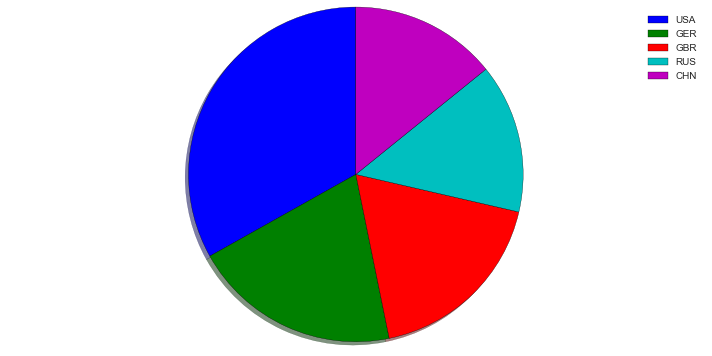

In [24]:
labels = list(dfTop['nationality'])
sizes = list(dfTop['medal_count'])
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
# You can save graphs as png or pdf
plt.savefig('graphs/pie.png')
plt.savefig('graphs/pie.pdf')
plt.show()

# Exercise 6: Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data?

In [25]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,46.0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,29.0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,24.0
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,25.0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,25.0


In [26]:
# Lets create a new table with information of male weightlifters
dfMW = df[(df['sport'] == 'weightlifting') & (df['sex'] == 'male')]
dfMW.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
120,242818896,Adrian Edward Zielinski,POL,male,3/28/89,1.70,94.0,weightlifting,0,0,0,27.0
186,162169475,Ahmed Mohamed,EGY,male,4/27/88,1.85,144.0,weightlifting,0,0,0,28.0
189,101574216,Ahmed Saad,EGY,male,11/1/86,1.60,62.0,weightlifting,0,0,0,29.0
403,745034260,Alexandr Spac,MDA,male,11/21/89,1.64,77.0,weightlifting,0,0,0,26.0
405,928138606,Alexandr Zaichikov,KAZ,male,8/17/92,1.80,105.0,weightlifting,0,0,1,23.0


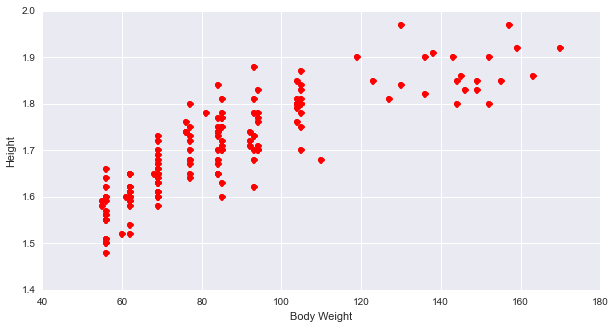

In [28]:
plt.plot(dfMW['weight'], dfMW['height'], 'ro')
#plt.axis([35, 192, 0, 500])
plt.xlabel('Body Weight')
plt.ylabel('Height')
plt.savefig('graphs/weightlifting.png')
plt.savefig('graphs/weightlifting.pdf')
plt.show()

## The weight classes are 56, 62, 69, 77, 85, 94, 105, 105+.

# Exercise 7: Generate a graph of male and female height distribution among all participants.

### Lets isolate 'sex' and 'height' columns

In [29]:
df[['sex', 'height']].head()

,sex,height
0,male,1.72
1,female,1.68
2,male,1.98
3,male,1.83
4,male,1.81


In [30]:
# Lets create two different tables, one for men and one for women.
dfM = df[df['sex'] == 'male']
dfF = df[df['sex'] == 'female']

### Lets go through the code that will generate the graph.

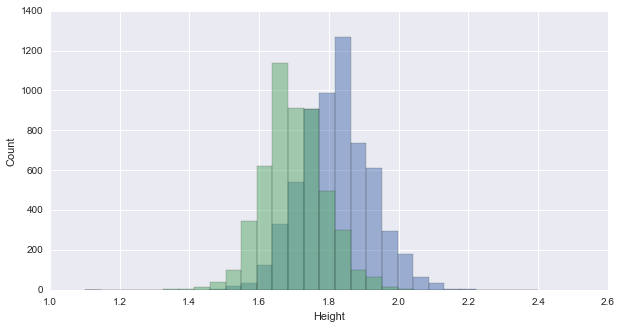

In [31]:
''' 
bins will divide our x axis into 30 intervals of equal length 
and the y axis represents the count of athletes with 
height within that interval.
'''
bins = np.linspace(1.1, 2.4, 30)

#plotting male data
plt.hist(list(dfM['height'].dropna()), 
         bins, alpha=0.5)

# plotting female data
plt.hist(list(dfF['height'].dropna()), 
         bins, alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Count')
plt.savefig('graphs/height.png')
plt.savefig('graphs/height.pdf')

plt.show()

# Exercise 8: Using the Seaborn package create a box plot for male and female height distribution among all participants.

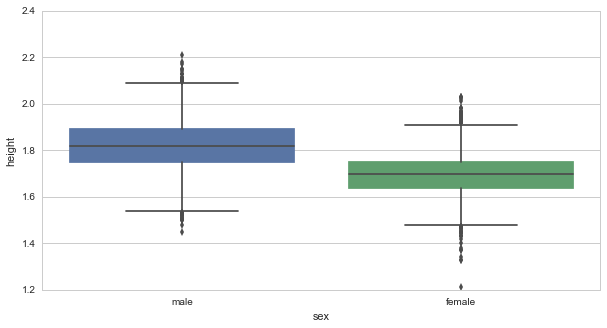

In [34]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="sex", y="height", data=df)

# Exercise 9: Create a world map for countries and their respective amount of medals in Carto.

### When we answered exercise 4 we created a table with countries and their amount of medals so lets work with that table.

In [35]:
dfTotal = df2[df2['medal_count'] > 0]
dfTotal.head()

,nationality,medal_count
198,USA,264
72,GER,160
68,GBR,145
159,RUS,115
38,CHN,113


## We need to change the 'nationality' code for the actual name of the countries.

In [36]:
dfC = pd.read_csv('olympic-games/countries.csv')
dfC.columns = ['country', 'nationality']
dfC.head()

,country,nationality
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [37]:
# Changing the code column name to make it easier to merge tables
dfC.columns = ['country', 'nationality']

## Pandas has a very neat function for joining tables call 'merge'. You need to specify on which column and how should the two columns be merge. The 'how' parameter is equivalent to what you would use on SQL.

In [38]:
dfTotal = dfTotal.merge(dfC, how='left', on='nationality')

In [39]:
dfTotal.head()

,nationality,medal_count,country
0,USA,264,United States
1,GER,160,Germany
2,GBR,145,United Kingdom
3,RUS,115,Russia
4,CHN,113,China


In [40]:
dfTotal.to_csv('countries.csv')

## Here the Carto map of the above table:
https://nelabdiel.carto.com/viz/b8bd9290-cbb2-11e6-b137-0ef24382571b/public_map

# _Optional_ Exercise 10: What else would you try?

In [43]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,46.0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,29.0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,24.0
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,25.0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,25.0


In [44]:
df.sport.unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis', 'canoe',
       'basketball', 'golf', 'archery', 'weightlifting', 'sailing',
       'tennis', 'gymnastics'], dtype=object)

# How many participants were there per sport?

In [45]:
sports = df.groupby('sport')['id'].count().reset_index()
sports.column = ['sport', 'athletes_count']
#sports = sports.sort_values(by='athletes_count', ascending=False)
sports.head()

,sport,id
0,aquatics,1445
1,archery,128
2,athletics,2363
3,badminton,172
4,basketball,288


In [46]:
sports = df.groupby('sport')['id'].count()
sports.head()

sport
aquatics      1445
archery        128
athletics     2363
badminton      172
basketball     288
Name: id, dtype: int64

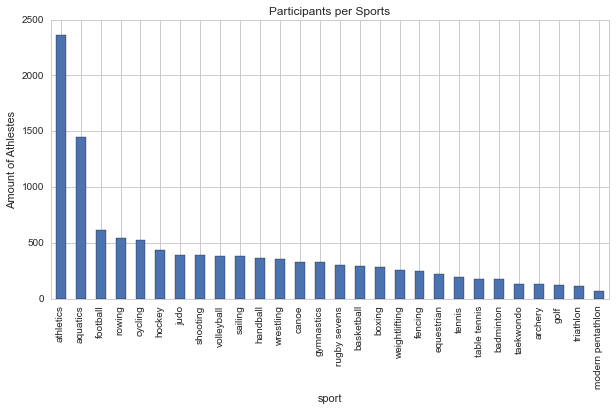

In [47]:
sports = sports.sort_values(axis=0, ascending=False)
sports.plot(kind='bar', title='Participants per Sports')
plt.ylabel('Amount of Athlestes')
plt.savefig('graphs/sports.png')
plt.savefig('graphs/sports.pdf')
plt.show()